# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [7]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize([0.5], [0.5])])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

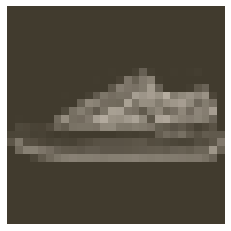

In [8]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [14]:
from torch import nn
from torch import optim

In [13]:
# TODO: Define your network architecture here
model = nn.Sequential(nn.Linear(784,256),
                      nn.ReLU(),
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Linear(128,10),
                      nn.LogSoftmax(dim=1))

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [15]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

images, labels = next(iter(trainloader))
images = images.view(images.shape[0],-1)

output = model.forward(images)
loss = criterion(output,labels)
loss.backward()
print('Gradient -', model[0].weight.grad)
optimizer.step()
print('Updated weights - ', model[0].weight)

Gradient - tensor([[ 0.0009,  0.0009,  0.0009,  ...,  0.0011,  0.0009,  0.0009],
        [-0.0008, -0.0008, -0.0008,  ..., -0.0004, -0.0008, -0.0008],
        [ 0.0008,  0.0008,  0.0008,  ...,  0.0008,  0.0008,  0.0008],
        ...,
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0005,  0.0006,  0.0007],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        [ 0.0015,  0.0015,  0.0015,  ...,  0.0013,  0.0015,  0.0015]])
Updated weights -  Parameter containing:
tensor([[ 0.0326,  0.0246, -0.0176,  ...,  0.0135,  0.0265, -0.0051],
        [ 0.0138, -0.0031, -0.0003,  ...,  0.0325, -0.0273,  0.0166],
        [-0.0265,  0.0317,  0.0202,  ..., -0.0116,  0.0156, -0.0144],
        ...,
        [-0.0259,  0.0038, -0.0205,  ...,  0.0313,  0.0147,  0.0171],
        [ 0.0048,  0.0237,  0.0191,  ...,  0.0337, -0.0167,  0.0163],
        [ 0.0047,  0.0073,  0.0213,  ..., -0.0186,  0.0331, -0.0165]],
       requires_grad=True)


In [18]:
# TODO: Train the network here
model = nn.Sequential(nn.Linear(784,256),
                      nn.ReLU(),
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Linear(128,10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 50
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.6234995002177224
Training loss: 0.8037342720194411
Training loss: 0.65412680378982
Training loss: 0.5920589446131863
Training loss: 0.5517224898534034
Training loss: 0.5225243704723143
Training loss: 0.5006637536545298
Training loss: 0.4837920360727859
Training loss: 0.47029942838050154
Training loss: 0.45928421289300614
Training loss: 0.44983259157966704
Training loss: 0.44146900666929256
Training loss: 0.43363946714380913
Training loss: 0.4270213979012422
Training loss: 0.42022739404808485
Training loss: 0.4145579001288424
Training loss: 0.4090362032498124
Training loss: 0.4041827913127474
Training loss: 0.39886281801375756
Training loss: 0.3946250344930427
Training loss: 0.3900927595301732
Training loss: 0.3857347680084995
Training loss: 0.3818547452595442
Training loss: 0.37824935643975416
Training loss: 0.37467448513454465
Training loss: 0.37097823642877376
Training loss: 0.3673165429200826
Training loss: 0.3646256479182477


KeyboardInterrupt: 

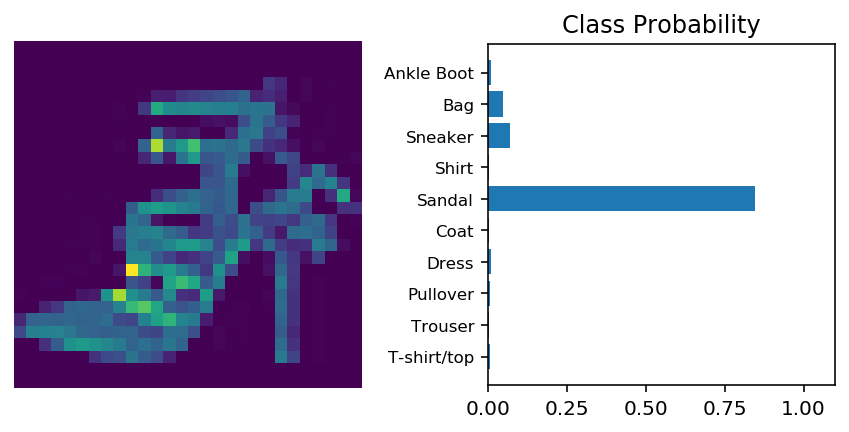

In [26]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logps = model.forward(img)
ps = torch.exp(logps)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')